# Step 1: Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Step 1.1: Loading the dataset

In [5]:
df = pd.read_csv("J:/Data Science/My Overall Notes/Data/non_linear_svm_club_data.csv")
df

,Dance_Moves,Joke_Quality,Secret_Club_Entry
0,6.829882,-3.452033,1
1,20.409904,-1.316147,1
2,-1.397515,4.543905,1
3,8.857479,2.863418,0
4,11.824585,-4.977105,1
...,...,...,...
295,3.858328,-1.563335,1
296,2.023557,11.034993,0
297,-6.617741,8.507276,0
298,16.661608,-0.798466,1


# Scenario:
#### This dataset predicts whether an individual is allowed entry into a secret club based on their dance moves and joke quality. 
#### The relationship is non-linear, making it ideal for non-linear SVM models such as RBF kernel.

## Features

### `Dance_Moves`: Range: ~[-10, 10]
#### A score representing the quality of a person's dance moves.

### `Joke_Quality`: Range: ~[-10, 10]
#### A score representing the quality of jokes told by the person.

## Target

### `Secret_Club_Entry`: Binary classification (0, 1)
#### Whether the individual is allowed entry into the secret club.
#### 0: Not allowed.
#### 1: Allowed.

## Step 2: We will extract the dependent and independent variables from the given dataset.

In [11]:
X = df[['Dance_Moves', 'Joke_Quality']]
y = df['Secret_Club_Entry']

## Step 2.1: Spliting the dataset into training and Testing data

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3 Step 2.2: Fitting the Model to the Training set

In [17]:
# Train an SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', C=100.0, gamma=0.5)
rbf_svm.fit(X_train, y_train)

SVC(C=100.0, gamma=0.5)

## Step 2.3: Predicting Twoards the Test Result

In [20]:
# Predict on test data
y_pred = rbf_svm.predict(X_test)

# Evaluate the model
print("Non-Linear SVM (RBF Kernel) Classification Report:")
print(classification_report(y_test, y_pred))

Non-Linear SVM (RBF Kernel) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        52

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



## Step 3: Visualizing the Results

C:\Users\jeyaj\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


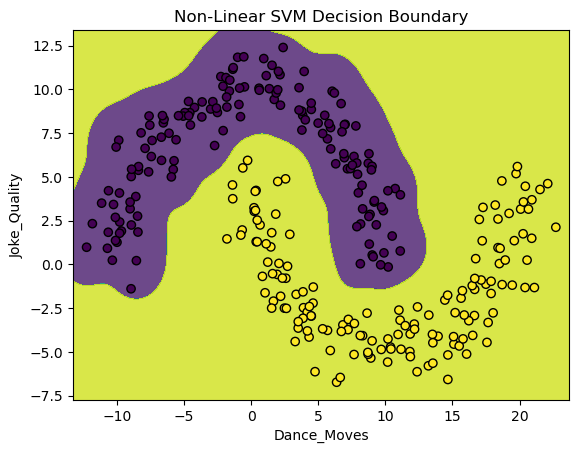

In [23]:
# Visualize decision boundary
def plot_decision_boundary(X, y, model):
    X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
    y = y.ravel()  # Flatten y if needed
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.xlabel('Dance_Moves')
    plt.ylabel('Joke_Quality')
    plt.title("Non-Linear SVM Decision Boundary")
    plt.show()
    
# Visualize decision boundary
plot_decision_boundary(X, y, rbf_svm)